In [4]:
# One hot encoding using numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

# Loading training data


In [7]:
train_df = pd.read_csv("data/Train.csv")
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [9]:
train_df.shape

(39209, 8)

In [15]:
# Loading input images
train_image = []
for i in tqdm(range(train_df.shape[0])):
    img = image.load_img("data/"+train_df['Path'][i], target_size=(28, 28, 3))
    img = image.img_to_array(img)
    img = img/255 # rescale the image to 
    train_image.append(img)
    
X = np.array(train_image)

100%|██████████| 39209/39209 [00:09<00:00, 4003.24it/s]


In [16]:
# Loading the target variables then convert to one hot encoding
y = train_df["ClassId"].values
y = to_categorical(y)

data/Train/5/00005_00050_00020.png


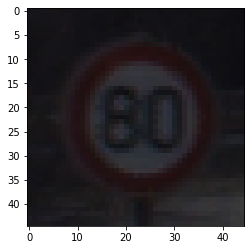

In [17]:
# Show sample image
img_num = 9950
img = plt.imread("data/"+train_df['Path'][img_num])
plt.imshow(img)
print("data/"+train_df['Path'][img_num])

In [19]:
# Validation Set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=7, test_size=0.2)

In [20]:
# Keras Model
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [22]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(28, 28, 3)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(43, activation="softmax"))

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
885/981 [==========================>...] - ETA: 2s - loss: 0.8563 - accuracy: 0.7787